# Fake Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

def generate_synthetic_data(
    n_hc_subjects=20,
    n_pd_subjects=20,
    min_weeks=40,
    max_weeks=52,
    noise_level=0.05,
    pd_decline_rate=0.01,
    seed=42
):
    """
    Generate synthetic activity data with:
    - HC subjects: flat activity profile over time (with noise)
    - PD subjects: declining activity over time (with noise)
    
    Args:
        n_hc_subjects (int): Number of healthy control subjects
        n_pd_subjects (int): Number of Parkinson's disease subjects
        min_weeks (int): Minimum number of weeks per subject
        max_weeks (int): Maximum number of weeks per subject
        noise_level (float): Standard deviation of random noise
        pd_decline_rate (float): Rate of decline for PD subjects per week
        seed (int): Random seed for reproducibility
        
    Returns:
        pd.DataFrame: DataFrame with synthetic data
    """
    np.random.seed(seed)
    
    # Day-of-week base activity patterns
    # Weekend (Sat-Sun) has higher activity than weekdays
    base_pattern = np.array([30, 30, 30, 30, 30, 40, 36])
    
    all_data = []
    
    # Generate HC subjects (stable activity)
    for subject_id in range(1, n_hc_subjects + 1):
        n_weeks = np.random.randint(min_weeks, max_weeks + 1)
        
        for week in range(1, n_weeks + 1):
            # Base activity with noise
            activity = base_pattern + np.random.normal(0, noise_level, 7)
            
            # Ensure values are positive and reasonable
            activity = np.clip(activity, 0.1, 200)
            
            all_data.append({
                'subject': f'HC_{subject_id}',
                'cohort': 'HC',
                'week_num': week,
                'Mon': activity[0],
                'Tue': activity[1],
                'Wed': activity[2],
                'Thu': activity[3],
                'Fri': activity[4],
                'Sat': activity[5],
                'Sun': activity[6]
            })
    
    # Generate PD subjects (declining activity)
    for subject_id in range(1, n_pd_subjects + 1):
        n_weeks = np.random.randint(min_weeks, max_weeks + 1)
        
        for week in range(1, n_weeks + 1):
            # Base activity with decline and noise
            decline_factor = 1.0 - (week * pd_decline_rate)
            activity = base_pattern * decline_factor + np.random.normal(0, noise_level, 7)
            
            # Ensure values are positive and reasonable
            activity = np.clip(activity, 0.1, 200)
            
            all_data.append({
                'subject': f'PD_{subject_id}',
                'cohort': 'PD',
                'week_num': week,
                'Mon': activity[0],
                'Tue': activity[1],
                'Wed': activity[2],
                'Thu': activity[3],
                'Fri': activity[4],
                'Sat': activity[5],
                'Sun': activity[6]
            })
    
    # Create DataFrame
    df = pd.DataFrame(all_data)
    
    return df


In [4]:

def plot_synthetic_data(df, n_subjects_to_plot=5):
    """
    Visualize the synthetic data by plotting activity levels over time.
    
    Args:
        df (pd.DataFrame): DataFrame with synthetic data
        n_subjects_to_plot (int): Number of subjects from each cohort to plot
    """
    plt.figure(figsize=(14, 10))
    
    # Calculate mean daily activity for each subject and week
    df['mean_activity'] = df[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']].mean(axis=1)
    
    # Get unique subjects from each cohort
    hc_subjects = df[df['cohort'] == 'HC']['subject'].unique()
    pd_subjects = df[df['cohort'] == 'PD']['subject'].unique()
    
    # Randomly select subjects to plot
    np.random.shuffle(hc_subjects)
    np.random.shuffle(pd_subjects)
    hc_to_plot = hc_subjects[:n_subjects_to_plot]
    pd_to_plot = pd_subjects[:n_subjects_to_plot]
    
    # Plot HC subjects
    for subject in hc_to_plot:
        subject_data = df[df['subject'] == subject]
        plt.plot(subject_data['week_num'], subject_data['mean_activity'], 'b-', alpha=0.5)
    
    # Plot PD subjects
    for subject in pd_to_plot:
        subject_data = df[df['subject'] == subject]
        plt.plot(subject_data['week_num'], subject_data['mean_activity'], 'r-', alpha=0.5)
    
    # Add cohort averages
    hc_avg = df[df['cohort'] == 'HC'].groupby('week_num')['mean_activity'].mean()
    pd_avg = df[df['cohort'] == 'PD'].groupby('week_num')['mean_activity'].mean()
    
    plt.plot(hc_avg.index, hc_avg.values, 'b-', linewidth=1, label='HC Average')
    plt.plot(pd_avg.index, pd_avg.values, 'r-', linewidth=1, label='PD Average')
    
    plt.xlabel('Week Number')
    plt.ylabel('Mean Daily Activity')
    plt.title('Synthetic Activity Data: HC vs PD Subjects')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


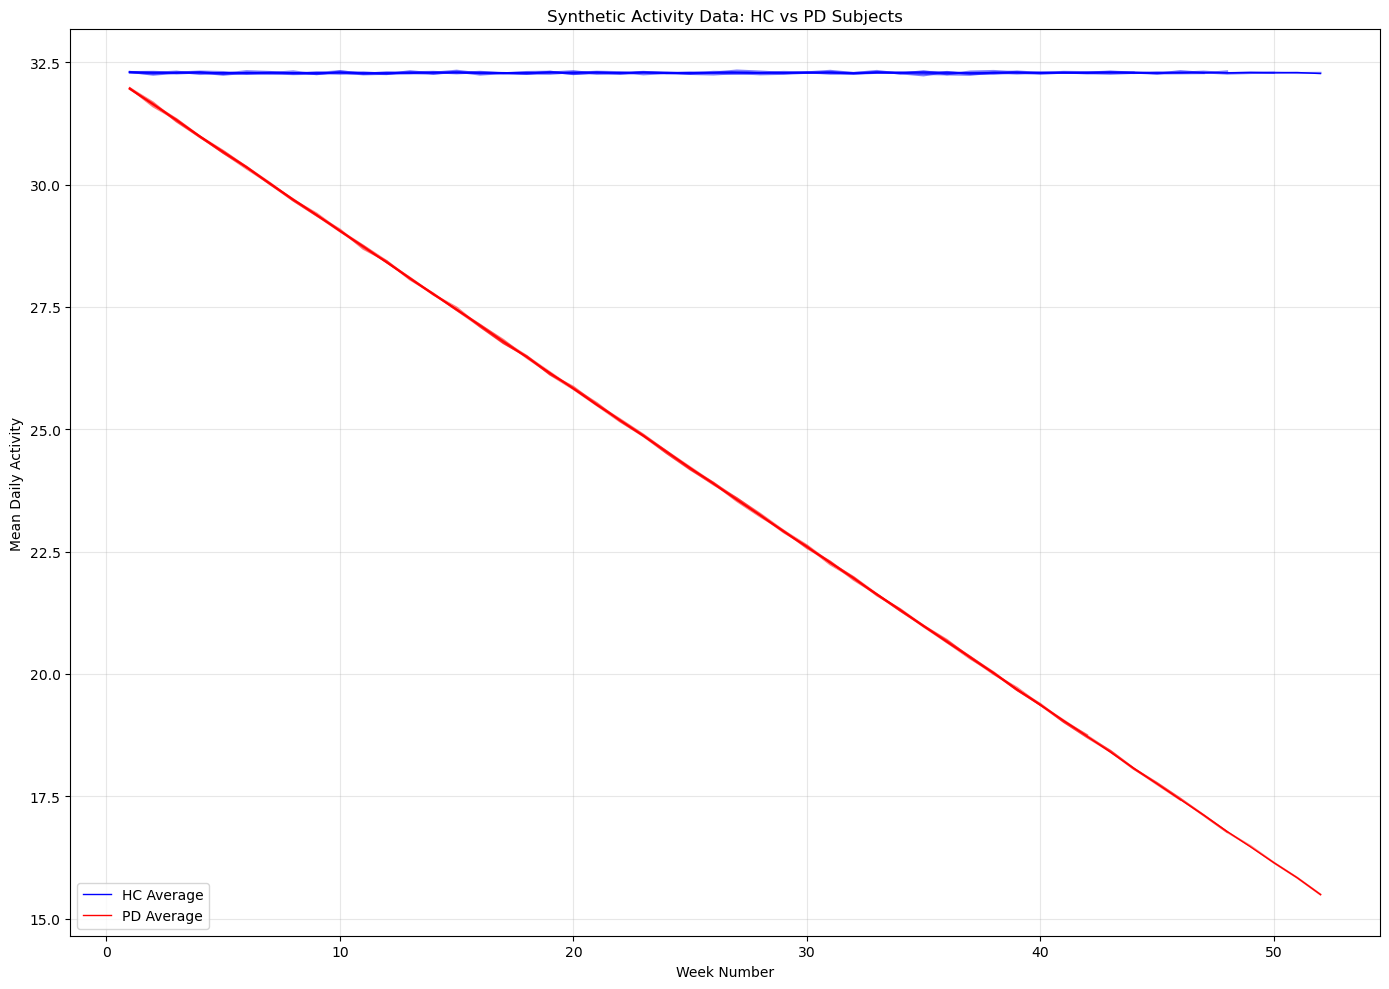

In [5]:
# test out the fake data functions
synthetic_df = generate_synthetic_data()

# plot the synthetic data
plot_synthetic_data(synthetic_df)

In [6]:
# output the synthetic data to a csv file
synthetic_df.to_csv('fake_data.csv', index=False)